In [260]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [262]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [264]:
df= pd.read_csv("Live.csv")
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [266]:
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)
df.drop(['status_id', 'status_published'], axis=1, inplace=True)

In [268]:
data = df.dropna()
print("The no of data-points after removing the rows with missing values are:", len(data))

The no of data-points after removing the rows with missing values are: 7050


In [270]:
from sklearn.preprocessing import LabelEncoder

X = df
y = df['status_type']

le = LabelEncoder()
X['status_type'] = le.fit_transform(X['status_type'])
y = le.transform(y)

In [272]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


In [274]:
from sklearn.preprocessing import MinMaxScaler

cols = X.columns
ms = MinMaxScaler()
X = ms.fit_transform(X)

X = pd.DataFrame(X, columns=[cols])

In [276]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=0) 
kmeans.fit(X)

KMeans(n_clusters=6, random_state=0)

In [278]:
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))


Result: 4014 out of 7050 samples were correctly labeled.


In [280]:
kmeans.inertia_

89.0401057782477

In [282]:
y_pred = kmeans.fit_predict(X)

In [284]:
from sklearn.metrics import adjusted_rand_score

score = adjusted_rand_score(y, y_pred)
print("Rand Index: ", score)

Rand Index:  0.8578084004192493


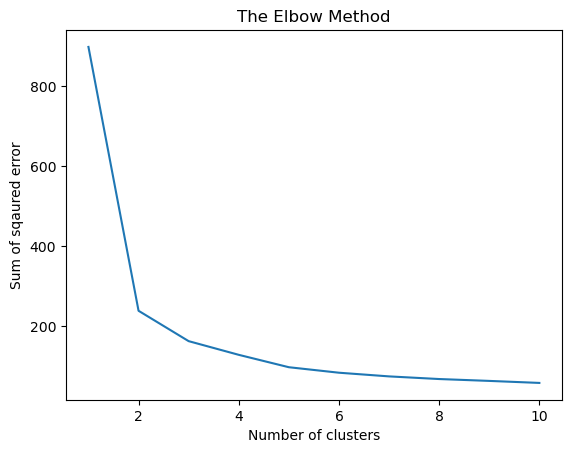

In [286]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of sqaured error')
plt.show()